In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
import random

In [2]:
print(f'Python  version:  {sys.version}')
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

Python  version:  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas  version = 1.4.4
numpy   version = 1.21.5
seaborn version = 0.11.2
2023-04-06 18:25:12.629162


In [3]:
df= pd.read_excel("dataforcoeff.xlsx")
df.sample(133)

,CB_IR_Test,CB_ConT_Test,CB_CR_Test,CB_SF6Press_Test,CB_SF6Dew_Test,CB_SF6_Test,CB_SF6Pur_Test,CB_SO2_Test,CB_Vis_Test,CB_Gas_Test,...,DS_Lub_Test,HI_DS,LA_CR_Test,LA_IR_Test,LA_IP_Test,LA_Fas_Test,LA_UC_Test,LA_Ter_Test,HI_LA,HI_Total
77,10,0.000000,0,5.1,-10.0,80,100,0,0,1,...,0,100.0,200,10,1,0,0,0,100.000000,97.000000
112,10,36.000000,0,7.0,-44.0,80,100,0,0,1,...,0,100.0,200,10,1,0,0,0,100.000000,97.000000
104,10,-0.000787,0,5.0,-10.0,80,100,0,0,1,...,0,100.0,200,10,1,0,0,0,100.000000,97.000000
52,10,39.000000,0,6.3,-10.0,80,100,0,0,1,...,0,100.0,200,10,1,0,0,0,100.000000,97.000000
110,10,38.000000,0,7.2,-43.7,80,100,0,0,1,...,0,87.5,200,10,1,0,0,0,100.000000,95.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,10,0.000000,0,5.5,-10.0,80,100,0,0,1,...,0,87.5,200,10,1,5,0,0,83.333333,91.602778
84,10,0.000000,0,6.8,-10.0,80,100,0,0,1,...,0,87.5,200,10,1,0,0,0,100.000000,98.125000
129,10,-0.023958,0,6.5,-10.0,80,100,0,0,1,...,0,100.0,200,10,1,0,0,0,100.000000,100.000000
14,10,0.000000,0,5.2,-10.0,80,100,0,0,1,...,0,75.0,200,10,1,5,5,5,50.000000,79.527778


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CB_IR_Test        133 non-null    int64  
 1   CB_ConT_Test      133 non-null    float64
 2   CB_CR_Test        133 non-null    int64  
 3   CB_SF6Press_Test  133 non-null    float64
 4   CB_SF6Dew_Test    133 non-null    float64
 5   CB_SF6_Test       133 non-null    int64  
 6   CB_SF6Pur_Test    133 non-null    int64  
 7   CB_SO2_Test       133 non-null    int64  
 8   CB_Vis_Test       133 non-null    int64  
 9   CB_Gas_Test       133 non-null    int64  
 10  HI_CB             133 non-null    int64  
 11  CT_CR_Test        133 non-null    int64  
 12  CT_IR_Test        133 non-null    int64  
 13  CT_IP_Test        133 non-null    int64  
 14  CT_Turn_Test      133 non-null    int64  
 15  CT_Break_Test     133 non-null    int64  
 16  CT_Water_Test     133 non-null    int64  
 1

In [5]:
df.dropna(inplace=True)

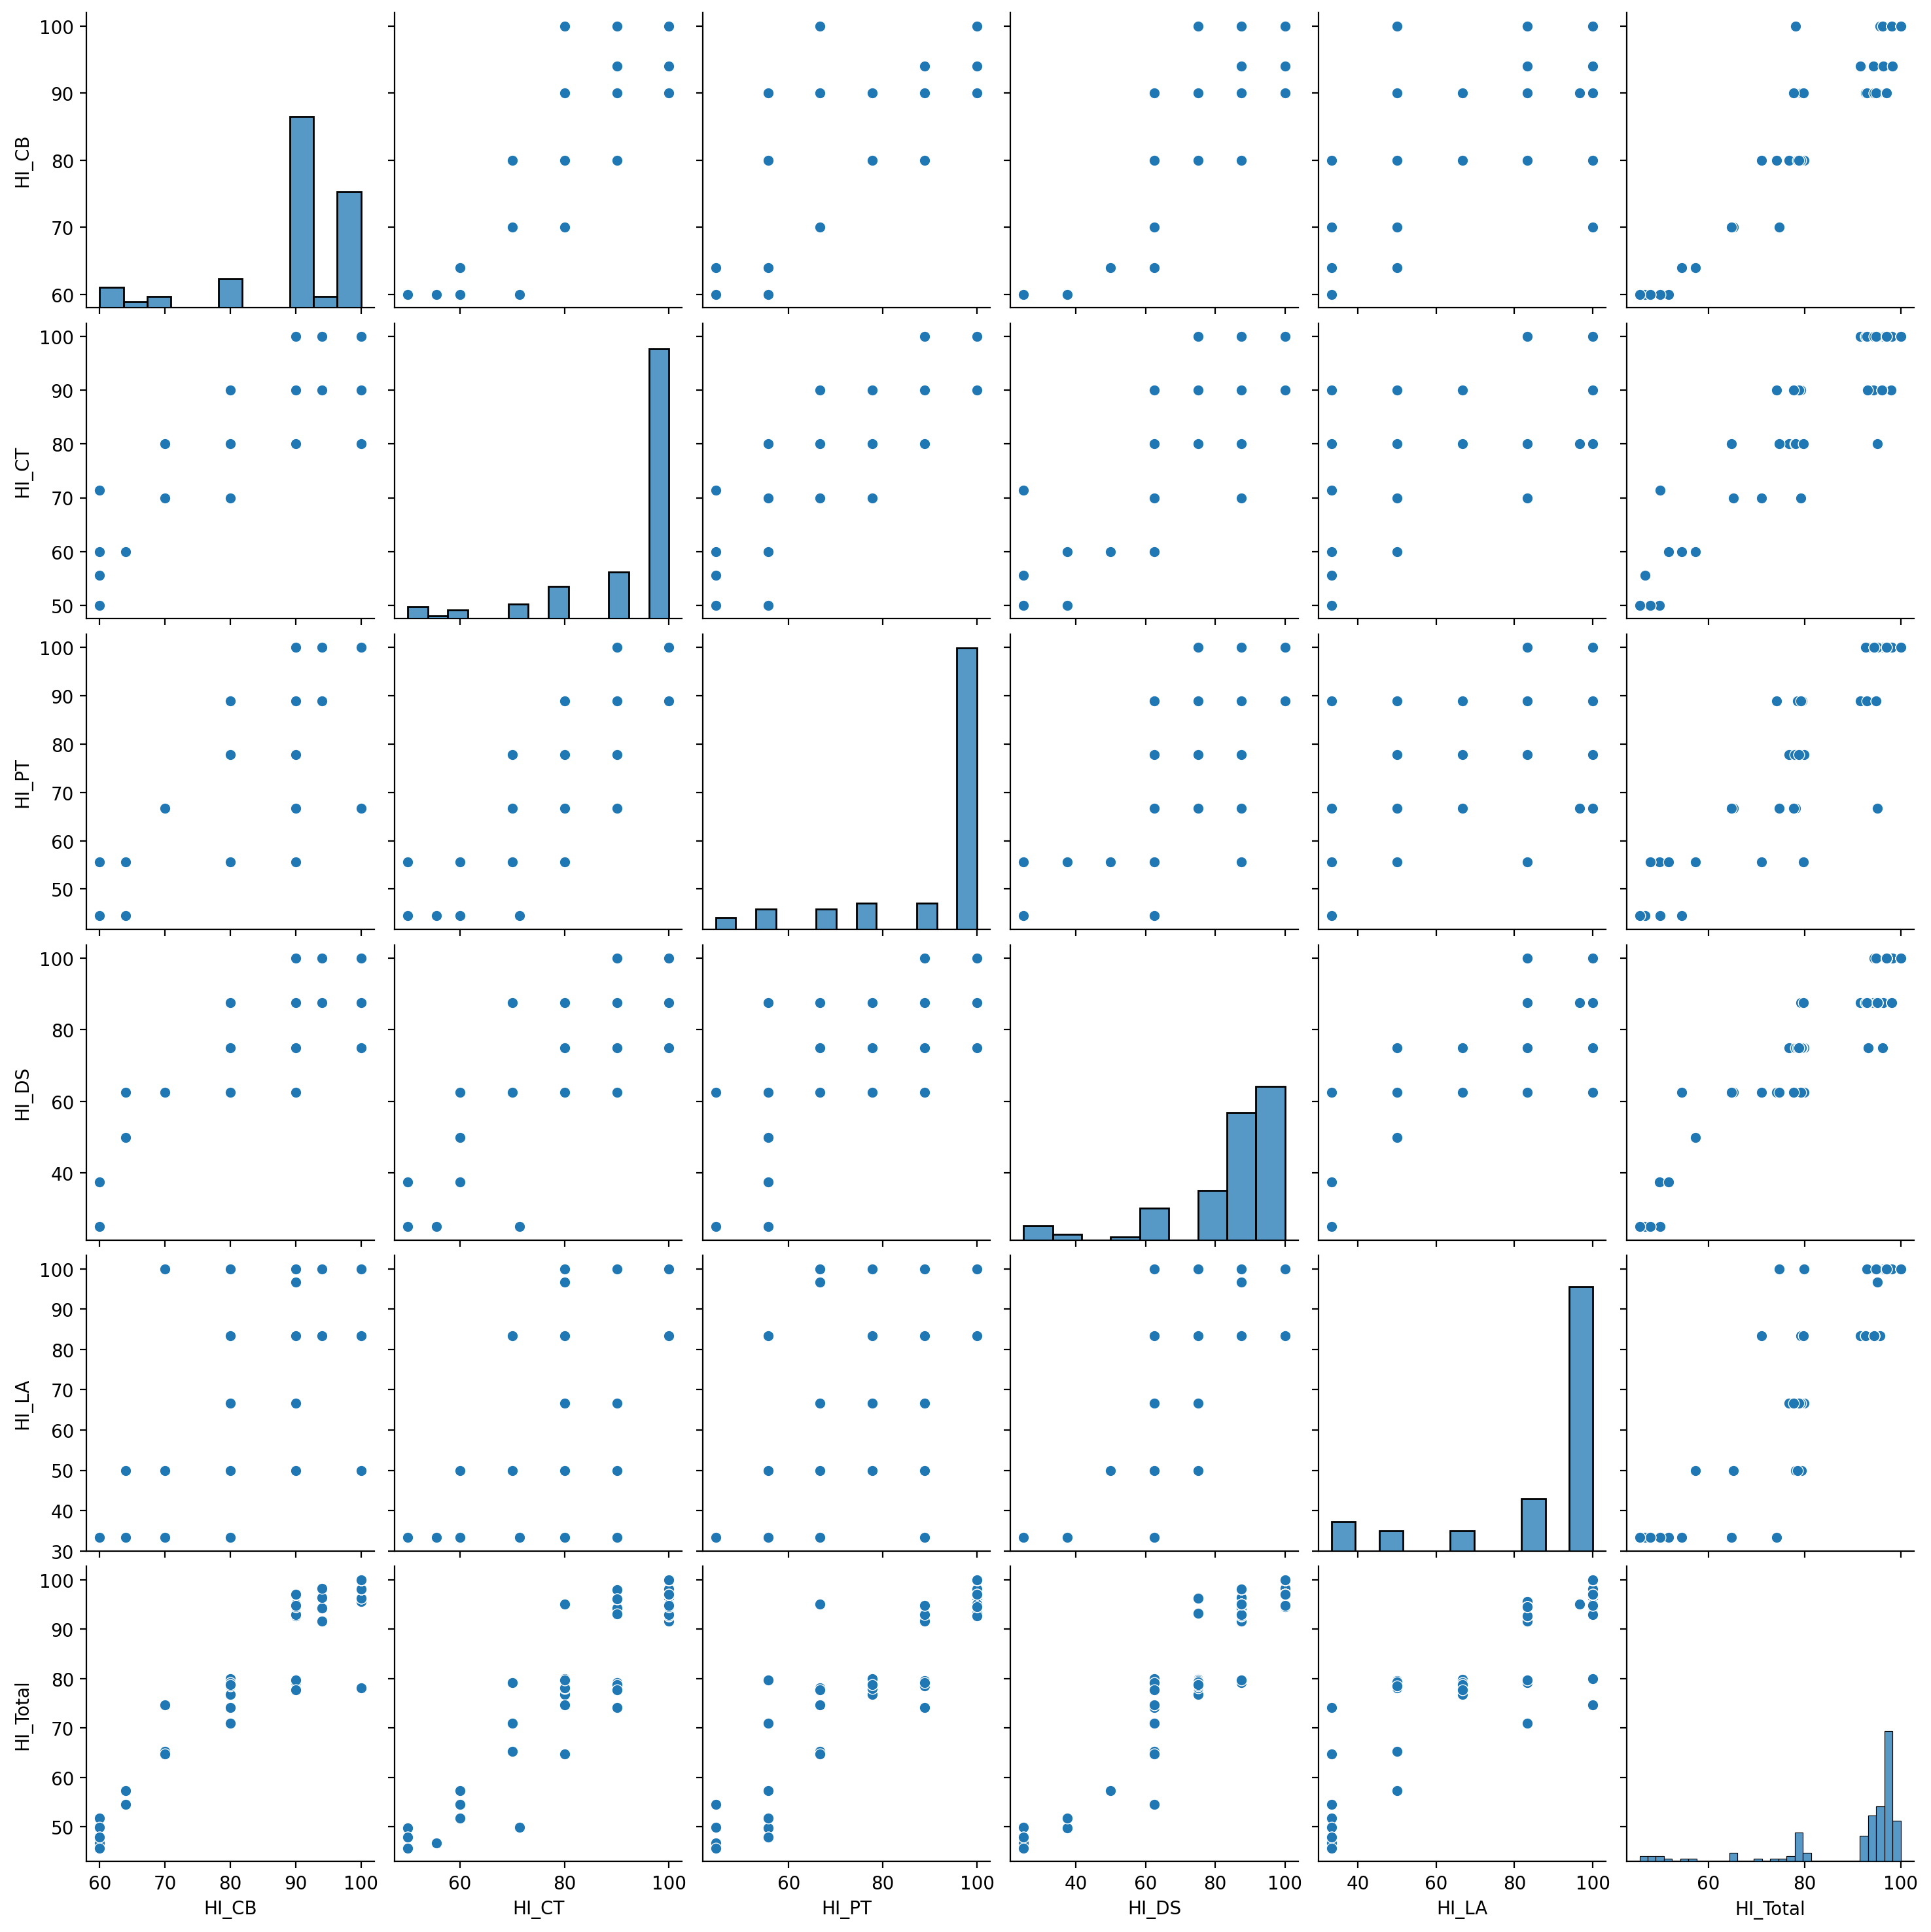

In [6]:
sns.pairplot(df[['HI_CB','HI_CT','HI_PT','HI_DS','HI_LA','HI_Total']])

In [7]:
df[['HI_CB' ,'HI_CT','HI_PT','HI_DS','HI_LA','HI_Total']].corr()

,HI_CB,HI_CT,HI_PT,HI_DS,HI_LA,HI_Total
HI_CB,1.000000,0.812796,0.813676,0.774219,0.778787,0.907484
HI_CT,0.812796,1.000000,0.915544,0.845929,0.813409,0.938246
HI_PT,0.813676,0.915544,1.000000,0.828657,0.820031,0.936008
HI_DS,0.774219,0.845929,0.828657,1.000000,0.798978,0.915514
HI_LA,0.778787,0.813409,0.820031,0.798978,1.000000,0.916171
HI_Total,0.907484,0.938246,0.936008,0.915514,0.916171,1.000000


In [8]:
import sklearn
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model

LinearRegression()

In [10]:
len(df)

133

In [11]:
df.columns

Index(['CB_IR_Test', 'CB_ConT_Test', 'CB_CR_Test', 'CB_SF6Press_Test',
       'CB_SF6Dew_Test', 'CB_SF6_Test', 'CB_SF6Pur_Test', 'CB_SO2_Test',
       'CB_Vis_Test', 'CB_Gas_Test', 'HI_CB', 'CT_CR_Test', 'CT_IR_Test',
       'CT_IP_Test', 'CT_Turn_Test', 'CT_Break_Test', 'CT_Water_Test',
       'CT_Fas_Test', 'CT_UC_Test', 'CT_Ter_Test', 'CT_Oil_Test', 'HI_CT',
       'PT_CR_Test', 'PT_IR_Test', 'PT_IP_Test', 'PT_Turn_Test',
       'PT_Break_Test', 'PT_Fas_Test', 'PT_UC_Test', 'PT_Ter_Test',
       'PT_Oil_Test', 'HI_PT', 'DS_CR_Test', 'DS_IR_Test', 'DS_IP_Test',
       'DS_Fas_Test', 'DS_UC_Test', 'DS_Func_Test', 'DS_TTh_Test',
       'DS_Lub_Test', 'HI_DS', 'LA_CR_Test', 'LA_IR_Test', 'LA_IP_Test',
       'LA_Fas_Test', 'LA_UC_Test', 'LA_Ter_Test', 'HI_LA', 'HI_Total'],
      dtype='object')

In [12]:
x=df.drop(columns=['HI_Total'])[:500]
y=df['HI_Total'][:500]

In [13]:
len(x)

133

In [14]:
y.head()

0    93.125000
1    95.125000
2    76.805556
3    65.208333
4    65.208333
Name: HI_Total, dtype: float64

In [15]:

model.fit(x, y)

LinearRegression()

In [16]:
model.score(x,y)

0.9989989101500505

In [17]:
model.intercept_

31.990951377017318

In [30]:
x.head(60)

,CB_IR_Test,CB_ConT_Test,CB_CR_Test,CB_SF6Press_Test,CB_SF6Dew_Test,CB_SF6_Test,CB_SF6Pur_Test,CB_SO2_Test,CB_Vis_Test,CB_Gas_Test,...,DS_TTh_Test,DS_Lub_Test,HI_DS,LA_CR_Test,LA_IR_Test,LA_IP_Test,LA_Fas_Test,LA_UC_Test,LA_Ter_Test,HI_LA
0,10,-0.014173,0,5.0,-10.0,80,100,0,0,1,...,0,0,87.5,200,10,1,0,0,0,100.000000
1,10,-0.008661,0,5.0,-10.0,80,100,0,0,1,...,0,0,87.5,200,10,1,0,0,0,100.000000
2,10,0.000000,0,4.8,-10.0,80,100,0,5,1,...,0,0,75.0,200,10,1,5,5,0,66.666667
3,10,40.000000,0,5.3,-24.0,80,100,0,5,1,...,5,0,62.5,200,10,1,5,5,5,50.000000
4,10,35.000000,0,4.8,-23.9,80,100,0,5,1,...,5,0,62.5,200,10,1,5,5,5,50.000000
5,10,41.000000,48,5.3,-10.0,80,100,0,5,1,...,5,5,37.5,200,5,1,5,5,5,33.333333
6,10,36.000000,41,5.1,-21.4,80,100,0,5,1,...,5,5,37.5,200,5,1,5,5,5,33.333333
7,10,33.000000,45,5.6,-10.0,80,100,0,5,1,...,5,5,50.0,200,5,1,5,5,0,50.000000
8,10,35.000000,44,5.8,-24.0,80,100,0,5,1,...,5,5,62.5,200,5,1,5,5,5,33.333333
9,10,0.000000,42,5.3,-10.0,80,100,0,0,1,...,0,0,75.0,200,10,1,0,0,5,83.333333


In [19]:

model.coef_

array([ 1.02871408e-03, -8.83696438e-04,  7.92849966e-04, -4.63968180e-02,
       -7.05236420e-04,  1.51822999e-14, -3.28417848e-14, -6.55031585e-15,
       -3.71483394e-03,  5.00988140e-15,  3.05183814e-01, -4.99600361e-16,
        2.10942375e-15, -8.18789481e-16,  3.80251386e-15, -9.99200722e-16,
       -6.93057978e-01, -6.63781607e-01, -5.33461067e-01, -4.61142597e-01,
       -6.05961177e-01, -5.13402363e-02, -4.16333634e-16,  2.22044605e-16,
        4.18156229e-01,  1.38777878e-16,  8.42217089e-02,  7.02839159e-02,
       -2.15107738e-01, -3.25603478e-01, -2.36066863e-01,  9.54893955e-02,
        6.80025052e-03,  0.00000000e+00,  0.00000000e+00,  8.27706977e-02,
        1.49408320e-01,  1.27737809e-01,  1.22284374e-01,  3.95700396e-02,
        1.90196429e-01,  0.00000000e+00,  3.26799292e-01,  0.00000000e+00,
       -2.98075332e-01, -3.13773715e-01, -2.25863193e-01,  5.87752334e-02])

In [38]:
x_test=df.drop(columns=['HI_Total'])[5:]
x_test.head()

,CB_IR_Test,CB_ConT_Test,CB_CR_Test,CB_SF6Press_Test,CB_SF6Dew_Test,CB_SF6_Test,CB_SF6Pur_Test,CB_SO2_Test,CB_Vis_Test,CB_Gas_Test,...,DS_TTh_Test,DS_Lub_Test,HI_DS,LA_CR_Test,LA_IR_Test,LA_IP_Test,LA_Fas_Test,LA_UC_Test,LA_Ter_Test,HI_LA
5,10,41.0,48,5.3,-10.0,80,100,0,5,1,...,5,5,37.5,200,5,1,5,5,5,33.333333
6,10,36.0,41,5.1,-21.4,80,100,0,5,1,...,5,5,37.5,200,5,1,5,5,5,33.333333
7,10,33.0,45,5.6,-10.0,80,100,0,5,1,...,5,5,50.0,200,5,1,5,5,0,50.000000
8,10,35.0,44,5.8,-24.0,80,100,0,5,1,...,5,5,62.5,200,5,1,5,5,5,33.333333
9,10,0.0,42,5.3,-10.0,80,100,0,0,1,...,0,0,75.0,200,10,1,0,0,5,83.333333


In [39]:
y_hat=model.predict(x_test)
y_hat

array([ 48.76803599,  51.73611111,  56.85755396,  55.44515902,
        79.07810487,  48.94849531,  46.86599818,  46.82854831,
        79.5718892 ,  79.60415767,  77.81513508,  47.38440146,
        79.94230045,  92.76507033,  91.49264329,  94.3101762 ,
        99.92900748,  94.421544  ,  94.97795231,  94.63992083,
        95.2265938 ,  93.43428318,  92.678138  ,  97.99754323,
        96.23150974,  96.23150974,  98.02382036,  95.55385648,
        99.78985385,  99.78985385,  97.99754323,  96.23150974,
        96.23150974,  95.55385648,  98.02382036,  96.96064679,
        93.59202294,  93.56418482,  94.44080724,  96.98462335,
        96.98219325,  95.33494636,  98.19548859,  98.19548859,
        92.77721119,  99.96152207,  96.95608075,  96.87521978,
        93.27760088,  93.05230892,  92.74899263,  93.06579772,
        96.02571458,  93.05792348,  93.05359236,  95.23755014,
        95.23818606,  96.93009137,  96.52318951,  96.99624445,
        94.42459024,  98.19302526,  94.44318579,  96.99

In [40]:
dc=pd.concat([df[5:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,CB_IR_Test,CB_ConT_Test,CB_CR_Test,CB_SF6Press_Test,CB_SF6Dew_Test,CB_SF6_Test,CB_SF6Pur_Test,CB_SO2_Test,CB_Vis_Test,...,HI_DS,LA_CR_Test,LA_IR_Test,LA_IP_Test,LA_Fas_Test,LA_UC_Test,LA_Ter_Test,HI_LA,HI_Total,predicted
0,5,10,41.000000,48,5.3,-10.0,80,100,0,5,...,37.5,200,5,1,5,5,5,33.333333,49.736111,48.768036
1,6,10,36.000000,41,5.1,-21.4,80,100,0,5,...,37.5,200,5,1,5,5,5,33.333333,51.736111,51.736111
2,7,10,33.000000,45,5.6,-10.0,80,100,0,5,...,50.0,200,5,1,5,5,0,50.000000,57.311111,56.857554
3,8,10,35.000000,44,5.8,-24.0,80,100,0,5,...,62.5,200,5,1,5,5,5,33.333333,54.463889,55.445159
4,9,10,0.000000,42,5.3,-10.0,80,100,0,0,...,75.0,200,10,1,0,0,5,83.333333,79.305556,79.078105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,128,10,0.296875,0,6.5,-10.0,80,100,0,0,...,100.0,200,10,1,0,0,0,100.000000,100.000000,99.951980
124,129,10,-0.023958,0,6.5,-10.0,80,100,0,0,...,100.0,200,10,1,0,0,0,100.000000,100.000000,99.952264
125,130,10,0.019792,0,6.5,-10.0,80,100,0,0,...,100.0,200,10,1,0,0,0,100.000000,100.000000,99.952225
126,131,10,-0.003150,0,4.8,-10.0,80,100,0,0,...,100.0,200,10,1,0,0,0,100.000000,97.000000,96.979282


In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
model_a = smf.ols(formula='HI_Total ~ CB_IR_Test + CB_ConT_Test + CB_CR_Test + CB_SF6Press_Test + CB_SF6Dew_Test + CB_SF6_Test + CB_SF6Pur_Test+ CB_SO2_Test + CB_Vis_Test + CB_Gas_Test + CT_CR_Test + CT_IR_Test + CT_IP_Test + CT_Turn_Test + CT_Break_Test + CT_Water_Test + CT_Fas_Test + CT_UC_Test + CT_Ter_Test+ CT_Oil_Test + PT_CR_Test + PT_IP_Test + PT_Break_Test + PT_Fas_Test + PT_UC_Test +PT_Turn_Test + PT_IR_Test + DS_CR_Test + DS_IR_Test + + DS_IP_Test + DS_Fas_Test + DS_UC_Test + DS_Func_Test + DS_TTh_Test + DS_Lub_Test + LA_CR_Test + LA_IR_Test + LA_IP_Test + LA_Fas_Test + LA_UC_Test+ LA_Ter_Test  '   , data = df[:100]).fit()

In [43]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:               HI_Total   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     723.3
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.32e-79
Time:                        18:54:08   Log-Likelihood:                -136.30
No. Observations:                 100   AIC:                             320.6
Df Residuals:                      76   BIC:                             383.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0006    1.7e-05  